In [1]:
import sys
sys.path.append('../')
import os

from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
import source.wlss as wlss
import source.vis as vis
import source.domain_transform_filter as dtf
from matplotlib.pyplot import figure
from skimage.metrics import peak_signal_noise_ratio as psnr

# Sample comparing the two methods

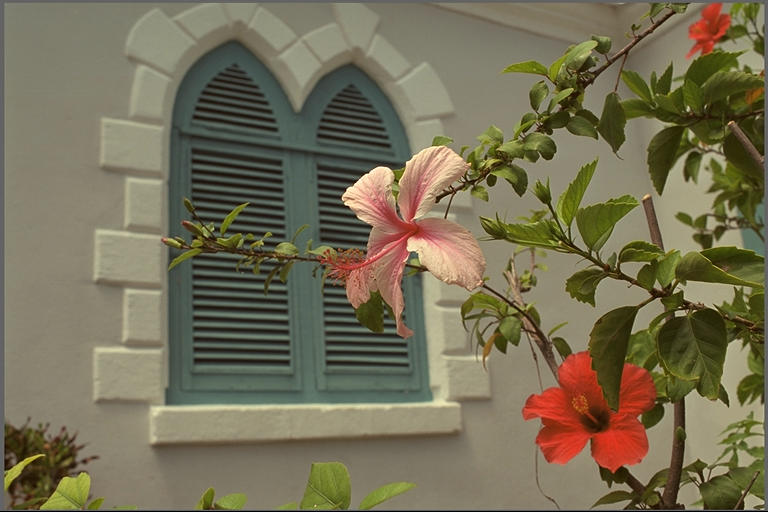

In [2]:
input_img = vis.load_img_rgb('../data/kodim07.png', scale = 0)

N,M = np.shape(input_img[:,:,0])

sigma_s = 200
alpha_r = 1
sigma_r = 50

Image.fromarray(np.uint8(input_img))

In [3]:
tol = 0.001
channels = 3

X,outs_gastal = dtf.admm_method_gastal(input_img, sigma_s, sigma_r, alpha_r, tol=tol, rho=20, channels=channels)
output_img_gastal = X*1

X, outs_farbman = wlss.admm_method_farbman(input_img,  sigma_s, sigma_r, alpha_r, tol=tol, rho=20, channels=channels)
output_img_farbman = X*1

print("farbman vs. gastal PSNR", psnr(output_img_farbman[:,:,0], output_img_gastal[:,:,0], data_range=255))
print("farbman vs. gastal SSIM", ssim(output_img_farbman[:,:,0], output_img_gastal[:,:,0], data_range=255))

farbman vs. gastal PSNR 37.8171903207441
farbman vs. gastal SSIM 0.987939452462154


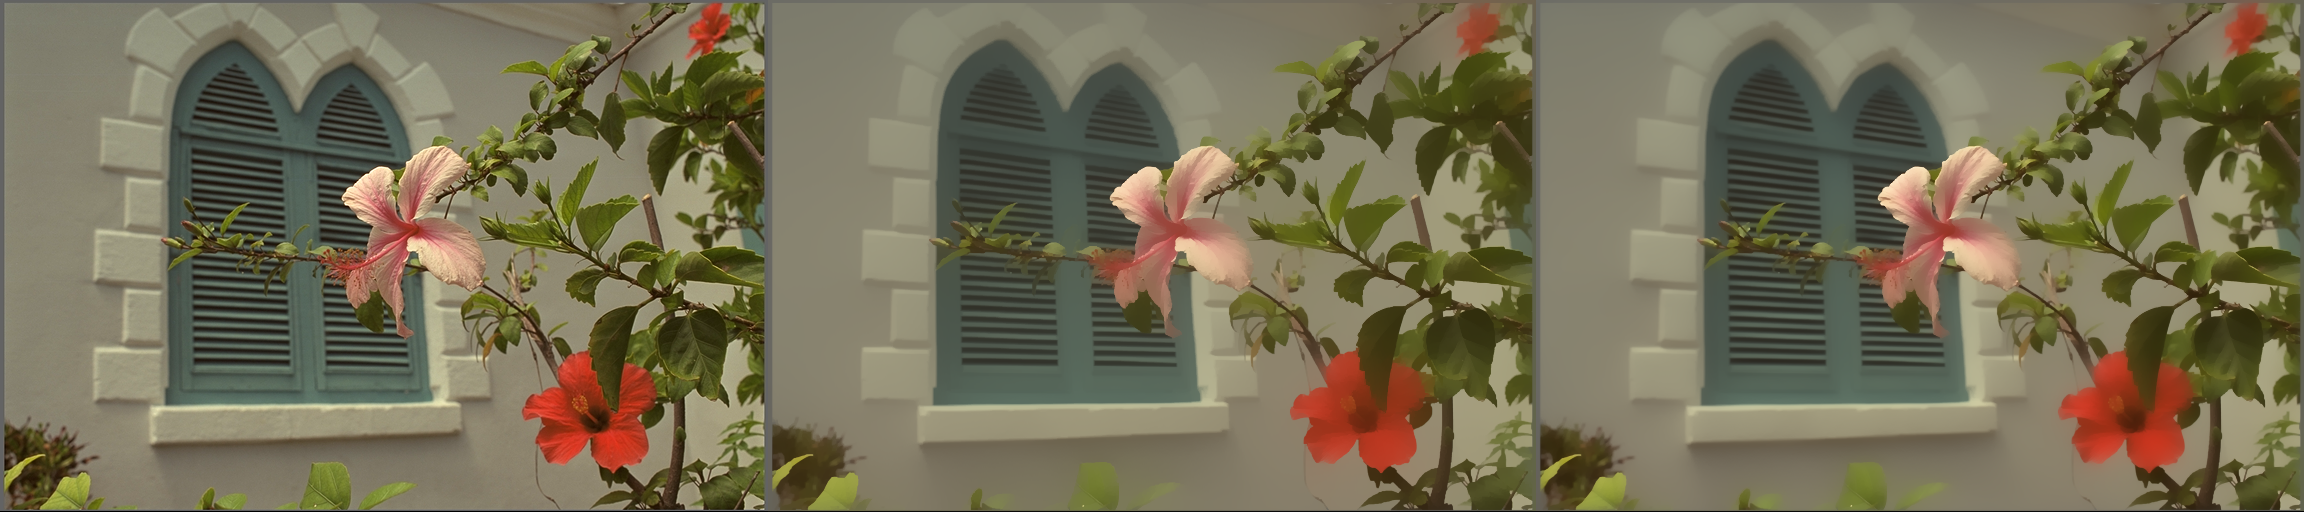

In [4]:
vis.display_img_rgb(np.concatenate([input_img, output_img_farbman, output_img_gastal], axis=1))